# **Essiential Imports**

In [ ]:
import warnings
warnings.simplefilter("ignore")

import re
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import gensim  # https://pypi.org/project/gensim/
import nltk #https://www.nltk.org/
from nltk.sentiment import SentimentIntensityAnalyzer #https://www.nltk.org/api/nltk.sentiment.html
from textblob import TextBlob #https://textblob.readthedocs.io/en/dev/
from wordcloud import WordCloud, STOPWORDS #https://pypi.org/project/wordcloud/

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

import tensorflow as tf
import plotly.express as px

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
from keras.preprocessing.text import Tokenizer
#for confusion matrix
import seaborn
from sklearn.metrics import confusion_matrix
import keras

# **Data Access**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
root = "/content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Datasets/"

Mounted at /content/drive


# **Import, Explore and Analyze Data**

In [ ]:
#dataset_path = "/content/all-covid19-vaccines-tweets/vaccination_all_tweets.csv"
tweets_df = pd.read_csv(root+'vaccination_all_tweets.csv')
#tweets_df = pd.read_csv(dataset_path)
tweets_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False


In [ ]:
print(f'The Dataset shape is:',tweets_df.shape)

The Dataset shape is: (56585, 16)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                56585 non-null  int64 
 1   user_name         56585 non-null  object
 2   user_location     43499 non-null  object
 3   user_description  52698 non-null  object
 4   user_created      56585 non-null  object
 5   user_followers    56585 non-null  int64 
 6   user_friends      56585 non-null  int64 
 7   user_favourites   56585 non-null  int64 
 8   user_verified     56585 non-null  bool  
 9   date              56585 non-null  object
 10  text              56585 non-null  object
 11  hashtags          44347 non-null  object
 12  source            56460 non-null  object
 13  retweets          56585 non-null  int64 
 14  favorites         56585 non-null  int64 
 15  is_retweet        56585 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 6.2+ MB


In [ ]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.658500e+04,5.658500e+04,56585.000000,5.658500e+04,56585.000000,56585.000000
mean,1.369533e+18,1.007127e+05,1306.046037,1.568134e+04,3.089547,13.585827
std,9.728607e+15,8.379072e+05,6017.296036,4.371546e+04,51.458322,200.297695
min,1.337728e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.365251e+18,1.150000e+02,145.000000,3.630000e+02,0.000000,0.000000
50%,1.371342e+18,5.510000e+02,413.000000,2.222000e+03,0.000000,1.000000
75%,1.377255e+18,2.565000e+03,1197.000000,1.156500e+04,1.000000,3.000000
max,1.381857e+18,1.497539e+07,516808.000000,1.220826e+06,7695.000000,22815.000000


**Missing Data**

In [ ]:
#Lets find out the mising data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,0,0,13086,3887,0,0,0,0,0,0,0,12238,125,0,0,0
Percent,0.0,0.0,23.12627,6.869312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.62764,0.220907,0.0,0.0,0.0
Types,int64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool


In [ ]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                56585 non-null  int64 
 1   user_name         56585 non-null  object
 2   user_location     43499 non-null  object
 3   user_description  52698 non-null  object
 4   user_created      56585 non-null  object
 5   user_followers    56585 non-null  int64 
 6   user_friends      56585 non-null  int64 
 7   user_favourites   56585 non-null  int64 
 8   user_verified     56585 non-null  bool  
 9   date              56585 non-null  object
 10  text              56585 non-null  object
 11  hashtags          44347 non-null  object
 12  source            56460 non-null  object
 13  retweets          56585 non-null  int64 
 14  favorites         56585 non-null  int64 
 15  is_retweet        56585 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 6.2+ MB


In [ ]:
# I could have dropped null holding rows but till this point I am only concerned 
# about the text it self so it would be a loss to drop rows containing text because of nonused columns

tweets_df.isnull().sum()

id                      0
user_name               0
user_location       13086
user_description     3887
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            12238
source                125
retweets                0
favorites               0
is_retweet              0
dtype: int64

**Unique Data**

In [ ]:
#Unique values
def unique_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    return(np.transpose(tt))

In [ ]:
unique_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,56585,56585,43499,52698,56585,56585,56585,56585,56585,56585,56585,44347,56460,56585,56585,56585
Uniques,56585,30809,10872,29633,31244,10883,5618,19398,2,55986,56517,20112,187,267,566,1


**Most Frequent Data**

In [ ]:
def most_frequent_values(data):
    total = data.count()
    tt = pd.DataFrame(total)
    tt.columns = ['Total']
    items = []
    vals = []
    for col in data.columns:
        itm = data[col].value_counts().index[0]
        val = data[col].value_counts().values[0]
        items.append(itm)
        vals.append(val)
    tt['Most frequent item'] = items
    tt['Frequence'] = vals
    tt['Percent from total'] = np.round(vals / total * 100, 3)
    return(np.transpose(tt))

In [ ]:
most_frequent_values(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
Total,56585,56585,43499,52698,56585,56585,56585,56585,56585,56585,56585,44347,56460,56585,56585,56585
Most frequent item,1340539111971516416,Workout Solutions,India,George Tsanis – Workout Solutions Health and F...,2010-09-20 17:01:08,0,0,0,False,2021-04-12 17:00:00,BREAKING NEWS : #SputnikV approved for emerge...,['Moderna'],Twitter Web App,0,0,False
Frequence,1,1371,1741,1371,1371,411,605,800,50590,4,6,2926,17691,37863,24101,56585
Percent from total,0.002,2.423,4.002,2.602,2.423,0.726,1.069,1.414,89.405,0.007,0.011,6.598,31.334,66.913,42.593,100.0


**Data Visualization**

In [ ]:
def plot_count(feature, title, df, size=1, ordered=True):
    f, ax = plt.subplots(1,1, figsize=(4*size,4))
    total = float(len(df))
    if ordered:
        g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set3')
    else:
        g = sns.countplot(df[feature], palette='Set3')
    g.set_title("Number and percentage of {}".format(title))
    if(size > 2):
        plt.xticks(rotation=90, size=8)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height,
                '{:1.2f}%'.format(100*height/total),
                ha="center") 
    plt.show()  

**Username**

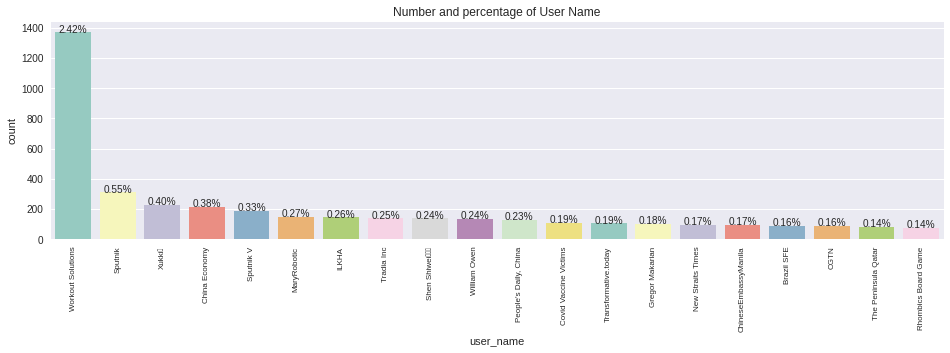

In [ ]:
# User Name
plot_count('user_name' , "User Name" , tweets_df , 4)

**User Location**

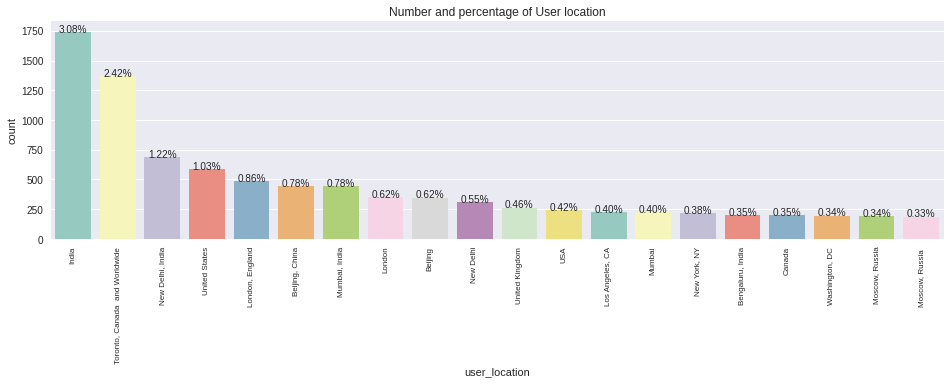

In [ ]:
# User Location
plot_count("user_location", "User location", tweets_df,4)

**Tweet Source**

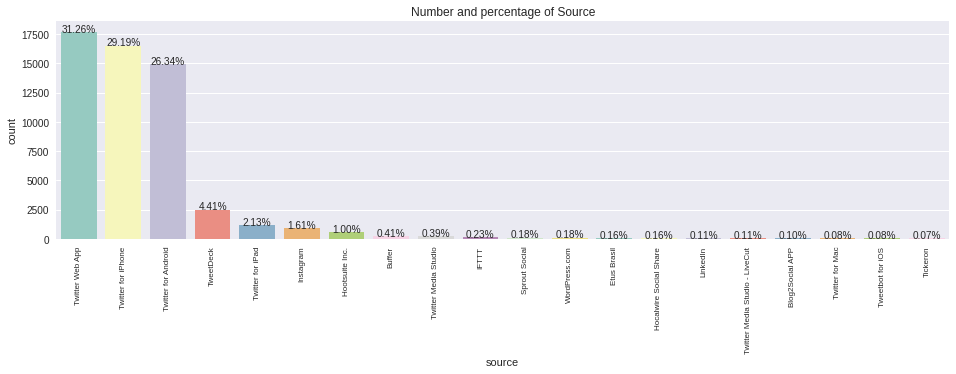

In [ ]:
#Tweet Source 
plot_count("source", "Source", tweets_df,4)

**Word Cloud**

In [ ]:
#Make a word Cloud from dataset
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=50,
        max_font_size=40, 
        scale=5,
        random_state=1
    ).generate(str(data))

    fig = plt.figure(1, figsize=(10,10))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [ ]:
def show_wordcloud(data, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update(["t", "co", "https", "amp", "U"])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,background_color="black").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

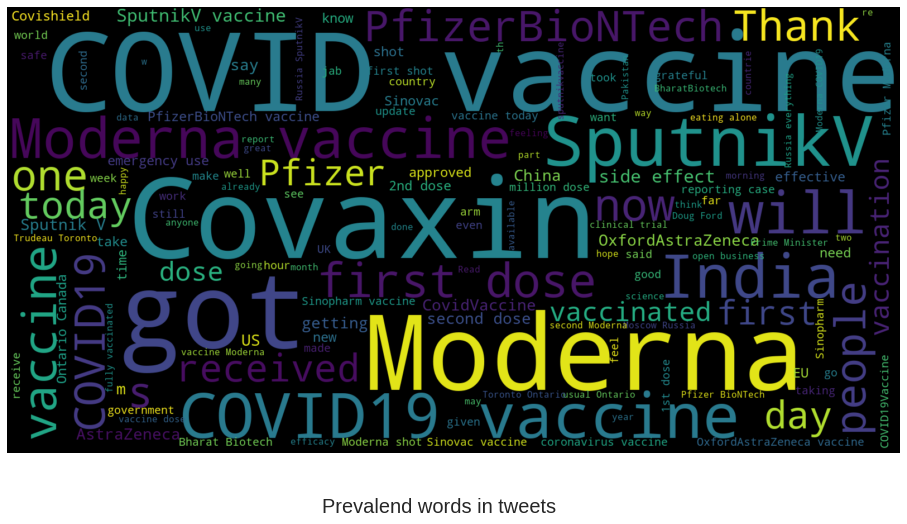

In [ ]:
show_wordcloud(tweets_df['text'] , title = 'Prevalend words in tweets')

**word cloud india**

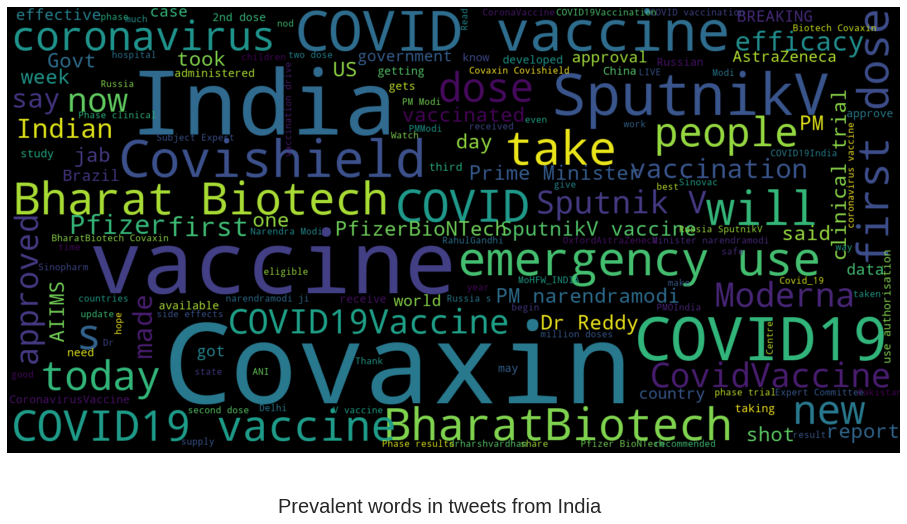

In [ ]:
india_df = tweets_df.loc[tweets_df.user_location=="India"]
show_wordcloud(india_df['text'], title = 'Prevalent words in tweets from India')

**word cloud USA**

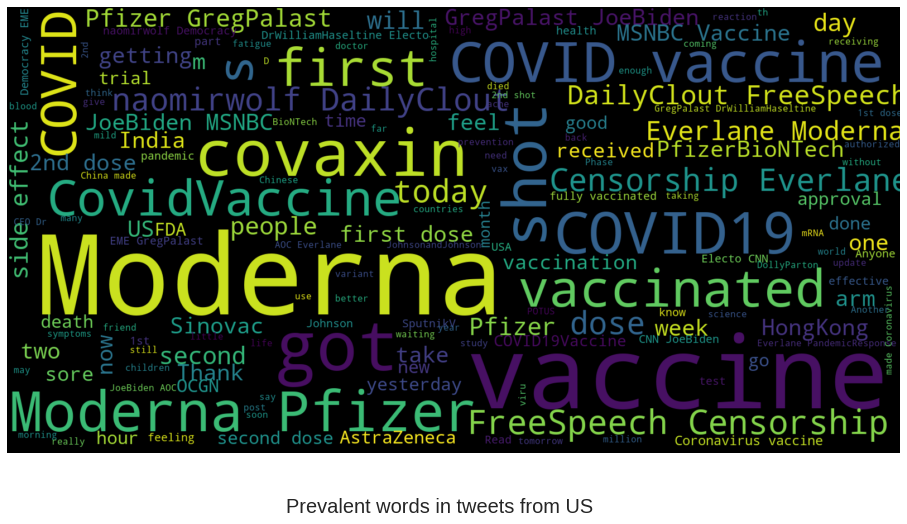

In [ ]:
us_df = tweets_df.loc[tweets_df.user_location=="United States"]
show_wordcloud(us_df['text'], title = 'Prevalent words in tweets from US')

**Word Cloud UK**

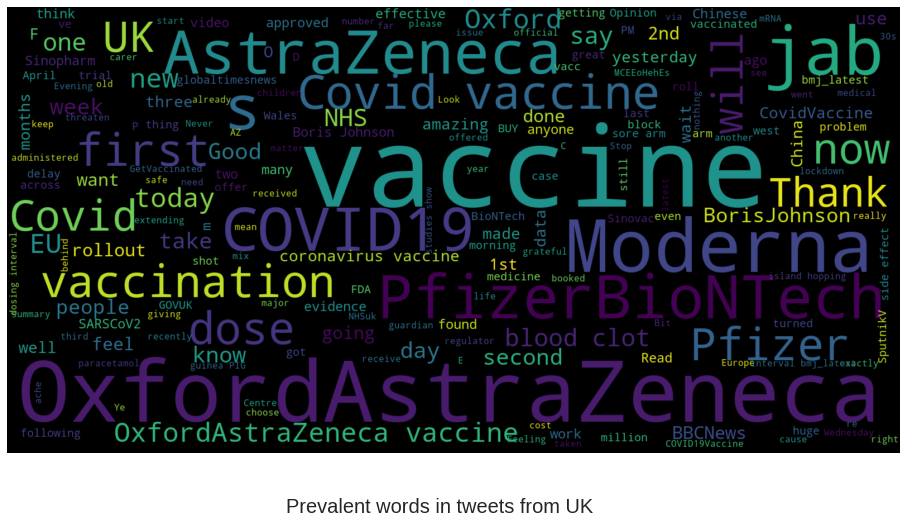

In [ ]:
uk_df = tweets_df.loc[tweets_df.user_location=="United Kingdom"]
show_wordcloud(uk_df['text'], title = 'Prevalent words in tweets from UK')

**Word Cloud Canada**

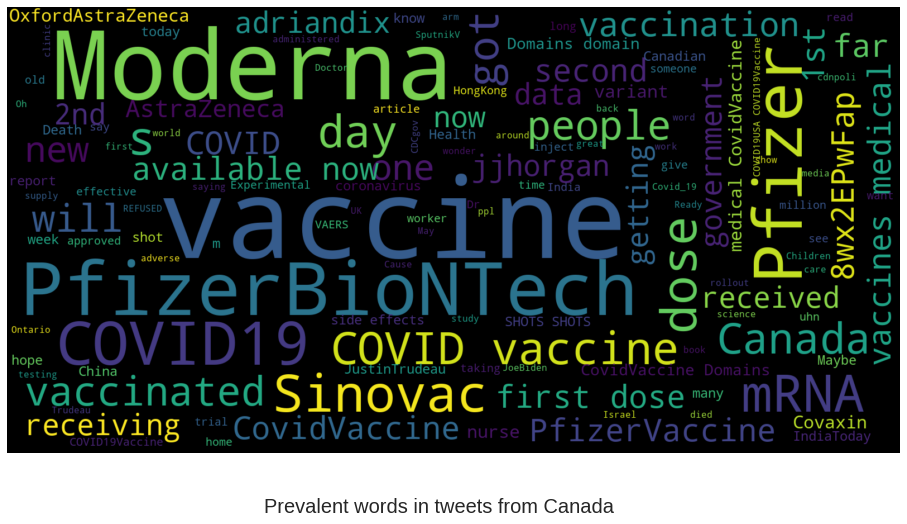

In [ ]:
ca_df = tweets_df.loc[tweets_df.user_location=="Canada"]
show_wordcloud(ca_df['text'], title = 'Prevalent words in tweets from Canada')

**Hashtags Analysis**

In [ ]:
def plot_features_distribution(features, title, df, isLog=False):
    plt.figure(figsize=(12,6))
    plt.title(title)
    for feature in features:
        if(isLog):
            sns.distplot(np.log1p(df[feature]),kde=True,hist=False, bins=120, label=feature,color='blue')
        else:
            sns.distplot(df[feature],kde=True, hist=False, bins=120, label=feature,color='blue')
    plt.xlabel('')
    plt.legend()
    plt.show()

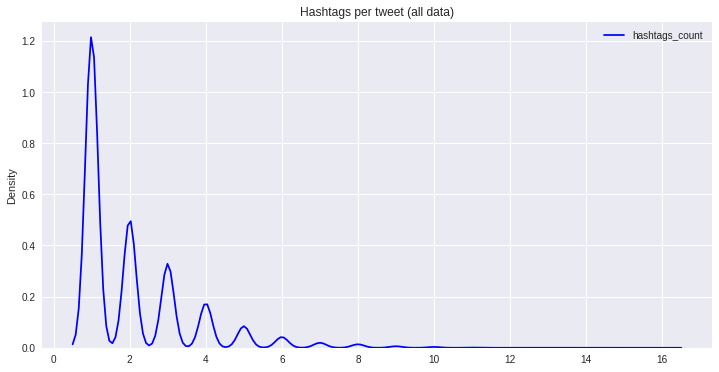

In [ ]:
tweets_df['hashtags'] = tweets_df['hashtags'].replace(np.nan, "['None']", regex=True)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.replace('\\N',''))
tweets_df['hashtags_count'] = tweets_df['hashtags'].apply(lambda x: len(x.split(',')))
plot_features_distribution(['hashtags_count'], 'Hashtags per tweet (all data)', tweets_df)

In [ ]:
tweets_df['hashtags_individual'] = tweets_df['hashtags'].apply(lambda x: x.split(','))
from itertools import chain
all_hashtags = set(chain.from_iterable(list(tweets_df['hashtags_individual'])))
print(f"There are totally Hastags of : {len(all_hashtags)}")

There are totally Hastags of : 16208


In [ ]:
tweets_df['datedt'] = pd.to_datetime(tweets_df['date'])
tweets_df['year'] = tweets_df['datedt'].dt.year
tweets_df['month'] = tweets_df['datedt'].dt.month
tweets_df['day'] = tweets_df['datedt'].dt.day
tweets_df['dayofweek'] = tweets_df['datedt'].dt.dayofweek
tweets_df['hour'] = tweets_df['datedt'].dt.hour
tweets_df['minute'] = tweets_df['datedt'].dt.minute
tweets_df['dayofyear'] = tweets_df['datedt'].dt.dayofyear
tweets_df['date_only'] = tweets_df['datedt'].dt.date

In [ ]:
tweets_agg_df = tweets_df.groupby(["date_only"])["text"].count().reset_index()
tweets_agg_df.columns = ["date_only", "count"]

In [ ]:
def plot_time_variation(df, x='date_only', y='count', hue=None, size=1, title="", is_log=False):
    f, ax = plt.subplots(1,1, figsize=(4*size,3*size))
    g = sns.lineplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    if hue:
        plt.title(f'{y} grouped by {hue} | {title}')
    else:
        plt.title(f'{y} | {title}')
    if(is_log):
        ax.set(yscale="log")
    ax.grid(color='black', linestyle='dotted', linewidth=0.75)
    plt.show() 

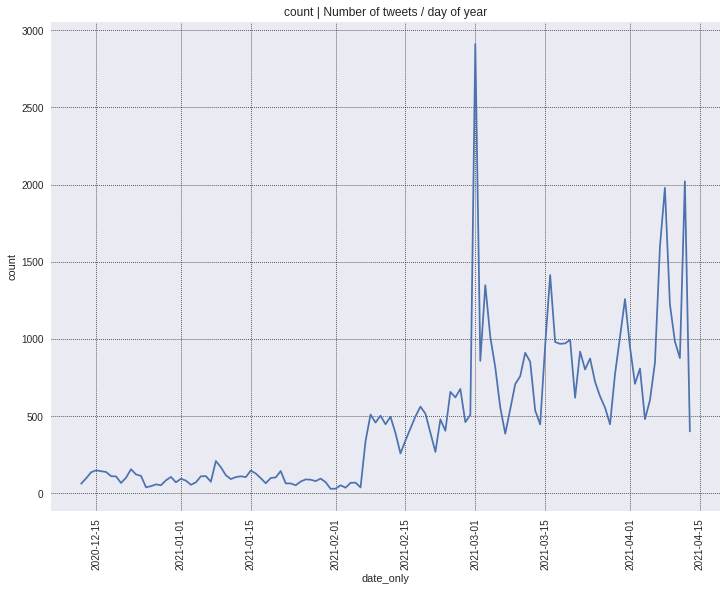

In [ ]:
plot_time_variation(tweets_agg_df, title="Number of tweets / day of year",size=3)

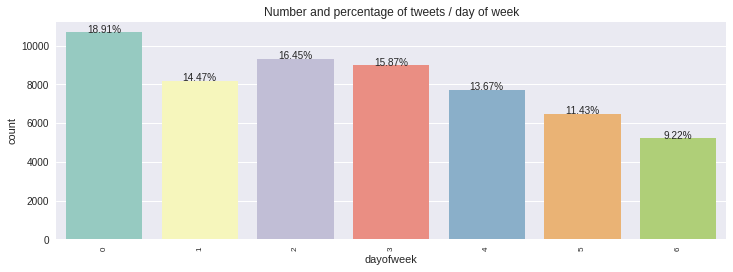

In [ ]:
plot_count("dayofweek", "tweets / day of week", tweets_df, size=3, ordered=False)

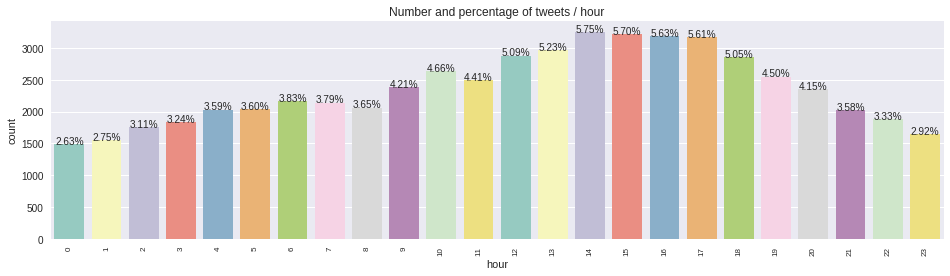

In [ ]:
plot_count("hour", "tweets / hour", tweets_df,size=4, ordered=False)

# **Data Pre-Processing**

In [ ]:
'''
The next steps about data cleaning will be:
- Remove URLs from the tweets
- Tokenize text
- Remove emails
- Remove new lines characters
- Remove distracting single quotes
- Remove all punctuation signs
- Lowercase all text
- Detokenize text
- Convert list of texts to Numpy array
'''
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [ ]:
temp = []
#Splitting pd.Series to list
data_to_list = tweets_df["text"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech ',
 'While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort weve ev… ',
 '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… ',
 'Facts are immutable, Senator, even when youre not ethically sturdy enough to acknowledge them. (1) You were born i… ',
 'Explain to me again why we need a vaccine #whereareallthesickpeople #PfizerBioNTech… ']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm', 'pfizerbiontech'], ['while', 'the', 'world', 'has', 'been', 'on', 'the', 'wrong', 'side', 'of', 'history', 'this', 'year', 'hopefully', 'the', 'biggest', 'vaccination', 'effort', 'weve', 'ev'], ['coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbiontech', 'moderna', 'covid_', 'russian', 'vaccine', 'is', 'created', 'to', 'last', 'years'], ['facts', 'are', 'immutable', 'senator', 'even', 'when', 'youre', 'not', 'ethically', 'sturdy', 'enough', 'to', 'acknowledge', 'them', 'you', 'were', 'born'], ['explain', 'to', 'me', 'again', 'why', 'we', 'need', 'vaccine', 'pfizerbiontech'], ['does', 'anyone', 'have', 'any', 'useful', 'advice', 'guidance', 'for', 'whether', 'the', 'covid', 'vaccine', 'is', 'safe', 'whilst', 'breastfeeding'], ['it', 'is', 'bit', 'sad', 'to', 'claim', 'the', 'fame', 'for', 'success', 'of', 'vaccination', 'on', 'patriotic', 'competition', 'between', 'usa', 'canada', 'uk', 'and'], ['there'

In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['same folks said daikon paste could treat cytokine storm pfizerbiontech', 'while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev', 'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine is created to last years', 'facts are immutable senator even when youre not ethically sturdy enough to acknowledge them you were born', 'explain to me again why we need vaccine pfizerbiontech']


In [ ]:
data = np.array(data)
#Create a sentiment column
tweets_df["sentiment"] = np.nan

In [ ]:
# borrowed from https://www.kaggle.com/pashupatigupta/sentiments-transformer-vader-embedding-bert
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
tweets_df['sentiment'] = tweets_df['text'].apply(lambda x: find_sentiment(x))
tweets_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,...,datedt,year,month,day,dayofweek,hour,minute,dayofyear,date_only,sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,...,2020-12-20 06:06:44,2020,12,20,6,6,6,355,2020-12-20,Positive
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,...,2020-12-13 16:27:13,2020,12,13,6,16,27,348,2020-12-13,Negative
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,...,2020-12-12 20:33:45,2020,12,12,5,20,33,347,2020-12-12,Positive
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,...,2020-12-12 20:23:59,2020,12,12,5,20,23,347,2020-12-12,Neutral
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,...,2020-12-12 20:17:19,2020,12,12,5,20,17,347,2020-12-12,Neutral
5,1337852648389832708,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",2020-01-26 21:43:12,105,108,106,False,2020-12-12 20:11:42,...,2020-12-12 20:11:42,2020,12,12,5,20,11,347,2020-12-12,Positive
6,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,...,2020-12-12 20:06:00,2020,12,12,5,20,6,347,2020-12-12,Positive
7,1337850832256176136,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",2019-03-25 04:14:29,21924,593,7815,True,2020-12-12 20:04:29,...,2020-12-12 20:04:29,2020,12,12,5,20,4,347,2020-12-12,Positive
8,1337850023531347969,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,2009-10-30 17:53:54,887,1515,9639,False,2020-12-12 20:01:16,...,2020-12-12 20:01:16,2020,12,12,5,20,1,347,2020-12-12,Neutral
9,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,...,2020-12-12 19:30:33,2020,12,12,5,19,30,347,2020-12-12,Neutral


In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}\n")  
    plt.tight_layout()
    plt.show()

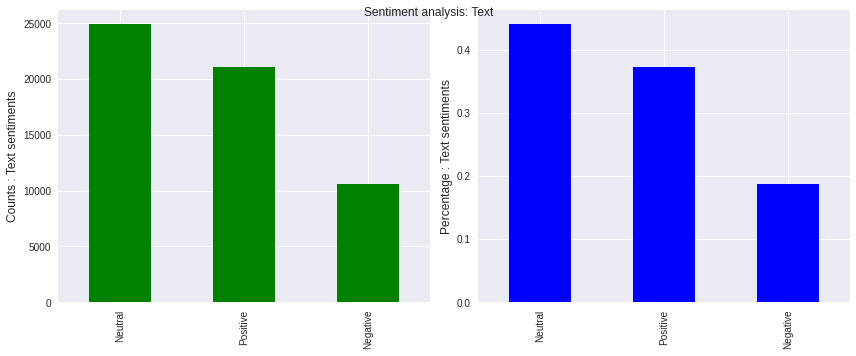

In [ ]:
plot_sentiment(tweets_df, 'sentiment', 'Text')

In [ ]:
# Label Encoding
labels = np.array(tweets_df["sentiment"])
y = []
for i in range(len(labels)):
    if labels[i] == 'Neutral':
        y.append(0)
    if labels[i] == 'Negative':
        y.append(1)
    if labels[i] == "Positive":
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
# #Conver the word to vec
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 

In [ ]:
# print(labels)

In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (f"Our data split form:\n")
print(f"X_train: ",len(X_train))
print(f"X_test: ",len(X_test))
print(f"y_train: ",len(y_train))
print(f"y_test: ", len(y_test))

Our data split form:

X_train:  42438
X_test:  14147
y_train:  42438
y_test:  14147


# **Fine Tuned Pretrained BERT Model**

In [ ]:
tweets_df["labels"] = np.nan

In [ ]:
tweets_df["labels"] = tweets_df["sentiment"].replace({'Neutral':0})
tweets_df["labels"] = tweets_df["labels"].replace({'Positive':1})
tweets_df["labels"] = tweets_df["labels"].replace({'Negative':2})

In [ ]:
df_train, df_test = train_test_split(tweets_df, test_size=0.1, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50926 entries, 13643 to 56422
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   50926 non-null  int64         
 1   user_name            50926 non-null  object        
 2   user_location        39151 non-null  object        
 3   user_description     47427 non-null  object        
 4   user_created         50926 non-null  object        
 5   user_followers       50926 non-null  int64         
 6   user_friends         50926 non-null  int64         
 7   user_favourites      50926 non-null  int64         
 8   user_verified        50926 non-null  bool          
 9   date                 50926 non-null  object        
 10  text                 50926 non-null  object        
 11  hashtags             50926 non-null  object        
 12  source               50810 non-null  object        
 13  retweets             50926 

In [ ]:
!pip install -qq transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 107.2 MB/s eta 0:00:00


In [ ]:
#Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

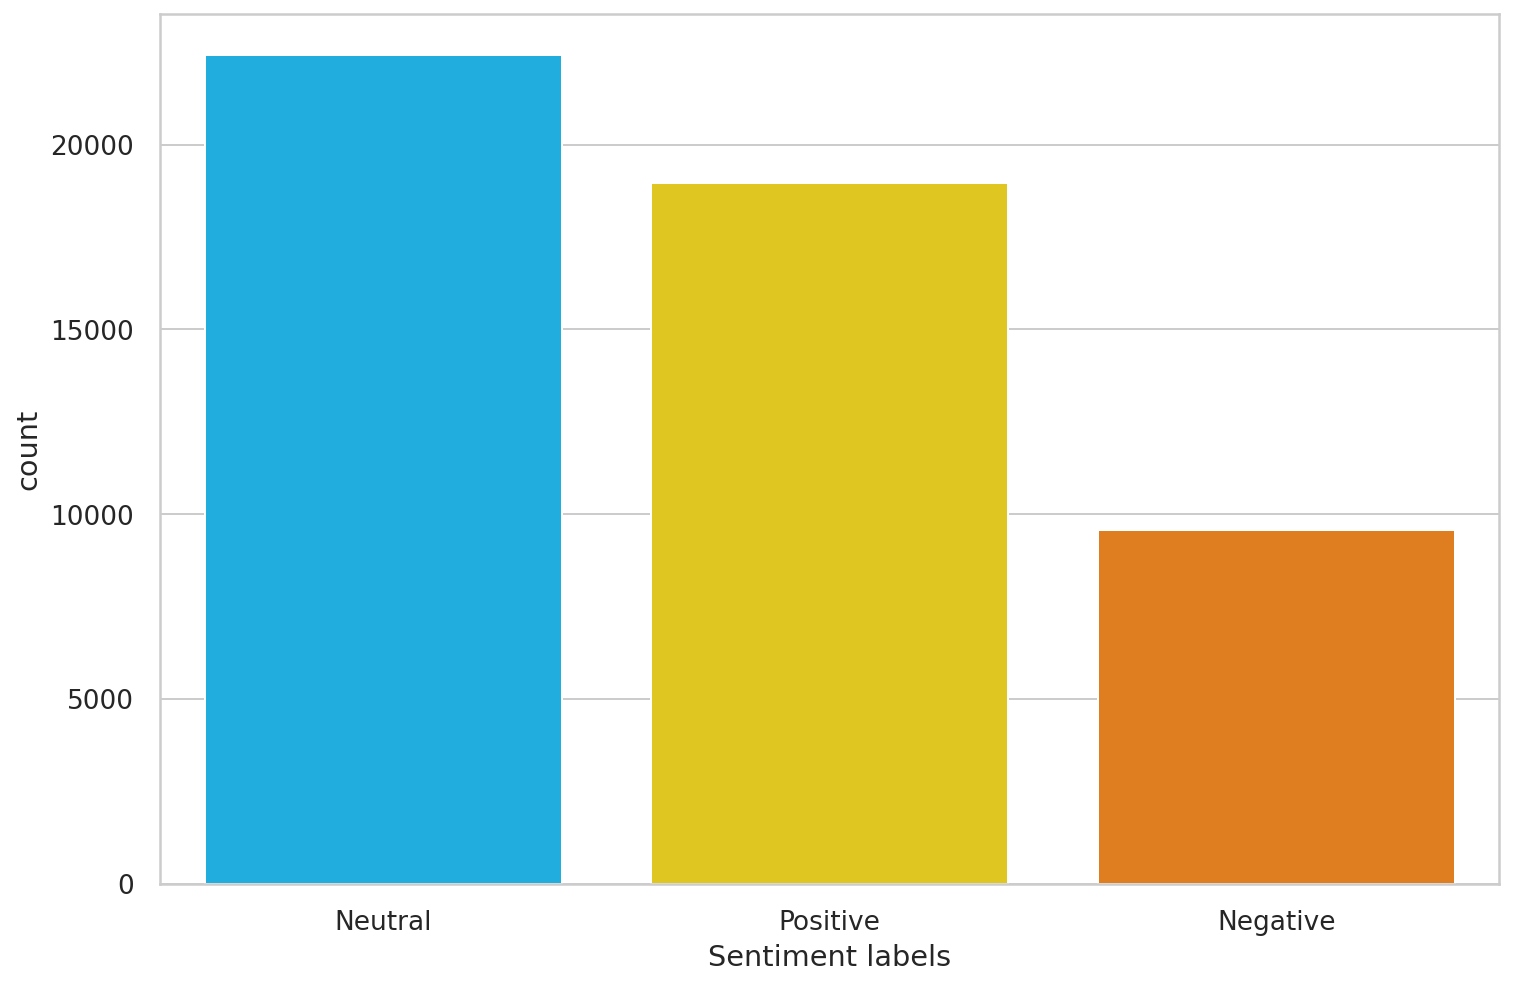

In [ ]:
sns.countplot(df_train.sentiment)
plt.xlabel('Sentiment labels');

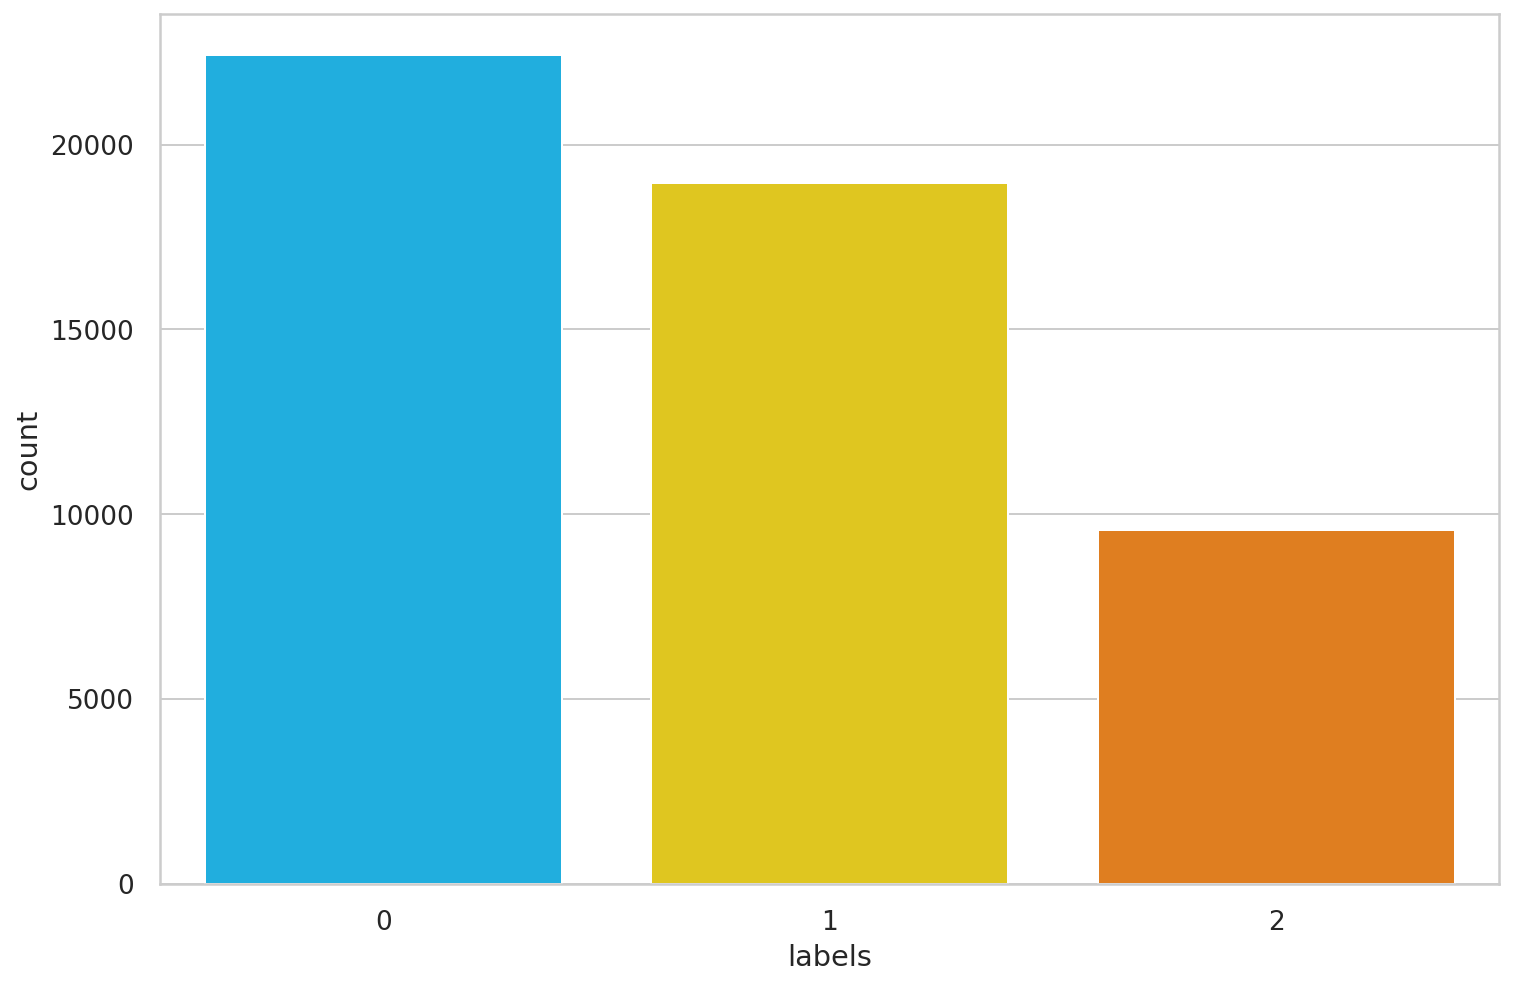

In [ ]:
sns.countplot(df_train.labels)
plt.xlabel('labels');

In [ ]:
class_names = ['Neutral','positive','negative']

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
token_lens = []

for txt in df_train.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


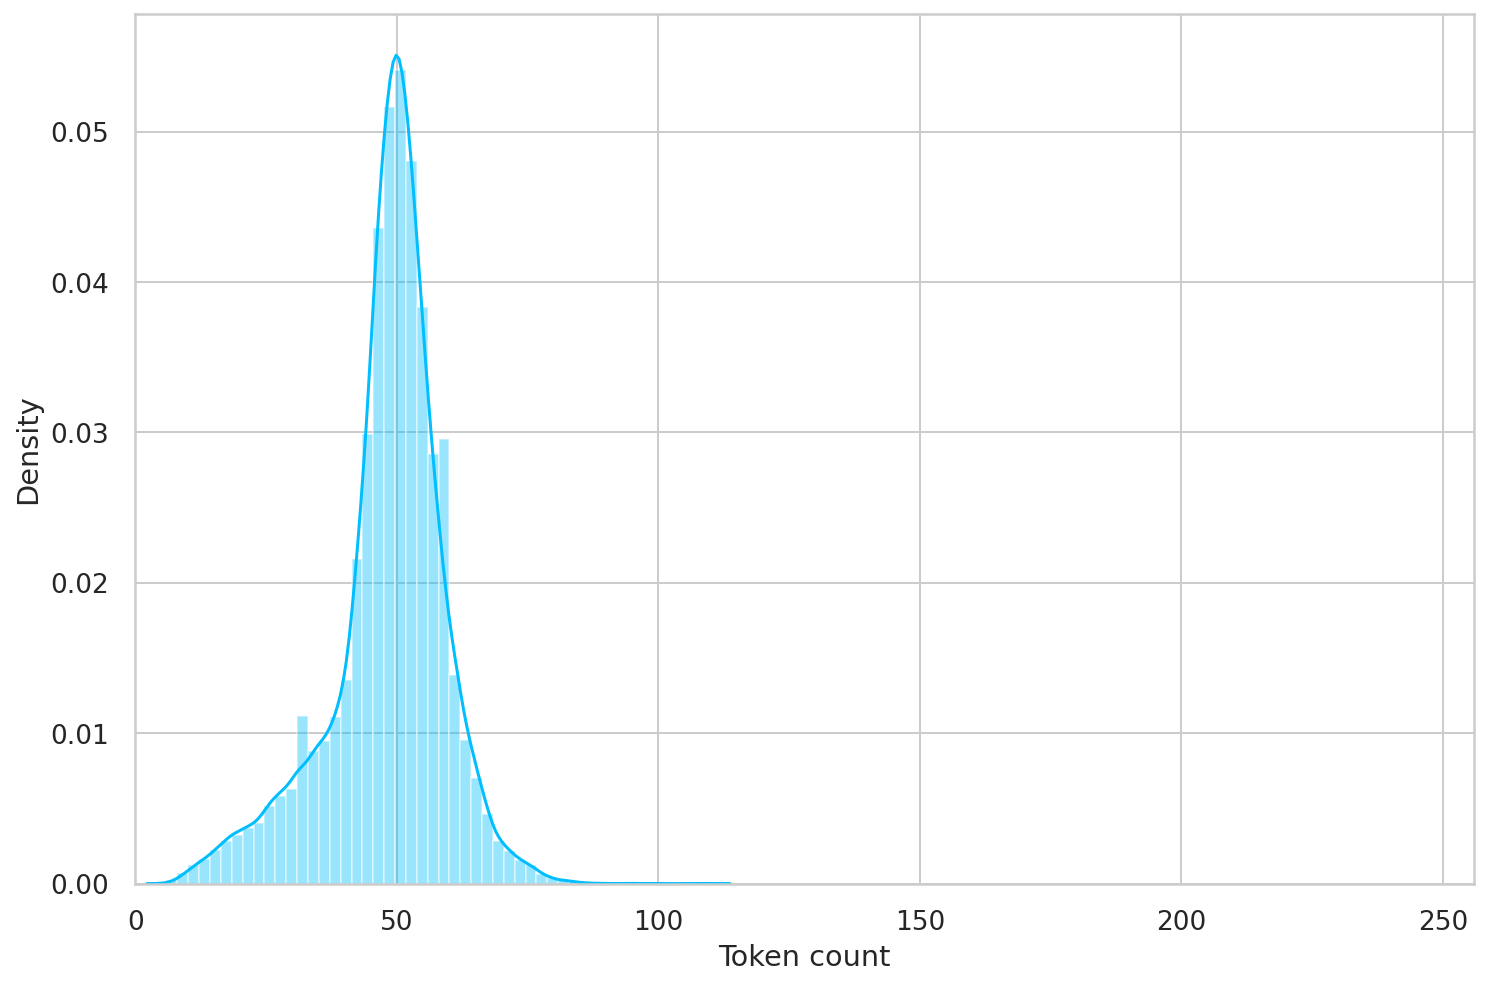

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 130

In [ ]:
class SentimentDataset(Dataset):

  def __init__(self, text, targets, tokenizer, max_len):
    self.text = text
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self, item):
    text = str(self.text[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      text,
      pad_to_max_length=True,
      max_length=self.max_len,
      add_special_tokens=True,
      return_token_type_ids=False,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SentimentDataset(
    text=df.text.to_numpy(),
    targets=df.labels.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size
  )

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((50926, 29), (2829, 29), (2830, 29))

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 130])
torch.Size([16, 130])
torch.Size([16])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_model.config.hidden_size

768

In [ ]:
class labelsClassifier(nn.Module):
  def __init__(self, n_classes):
    super(labelsClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    pooled_output = output[1]
    out = self.drop(pooled_output)
    return self.out(out)

In [ ]:
model = labelsClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 130])
torch.Size([16, 130])


In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.2163, 0.4691, 0.3146],
        [0.2362, 0.3507, 0.4131],
        [0.3020, 0.2926, 0.4055],
        [0.1786, 0.5309, 0.2905],
        [0.5570, 0.2185, 0.2245],
        [0.2136, 0.4424, 0.3440],
        [0.2529, 0.3299, 0.4172],
        [0.3858, 0.2144, 0.3998],
        [0.3588, 0.2417, 0.3995],
        [0.3071, 0.2046, 0.4883],
        [0.3096, 0.2230, 0.4674],
        [0.3630, 0.1900, 0.4469],
        [0.2266, 0.3869, 0.3864],
        [0.2639, 0.3269, 0.4092],
        [0.3129, 0.2675, 0.4195],
        [0.1364, 0.4343, 0.4293]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
EPOCHS = 5

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS


# Create a schedule with a learning rate that decreases linearly from the initial
# lr set in the optimizer to 0, after a warmup period during which it increases
# linearly from 0 to the initial lr set in the optimizer.
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0
EPOCHS = 5
for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), '/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/5
----------
Train loss 0.3422586149822814 accuracy 0.8815143541609394
Val   loss 0.18977800017685792 accuracy 0.9353128313891835

Epoch 2/5
----------
Train loss 0.15002324653810176 accuracy 0.9586458783332679
Val   loss 0.1591083701626966 accuracy 0.9529869211735597

Epoch 3/5
----------
Train loss 0.0891127514938707 accuracy 0.9781447590621687
Val   loss 0.2105016400037027 accuracy 0.9572287027218098

Epoch 4/5
----------
Train loss 0.05152811159938513 accuracy 0.9884538349762401
Val   loss 0.24264489807226988 accuracy 0.9572287027218098

Epoch 5/5
----------
Train loss 0.032091553532565535 accuracy 0.9931076463888779
Val   loss 0.24748484382505684 accuracy 0.9600565570873101

CPU times: user 1h 14min 17s, sys: 30min 56s, total: 1h 45min 14s
Wall time: 1h 45min 6s


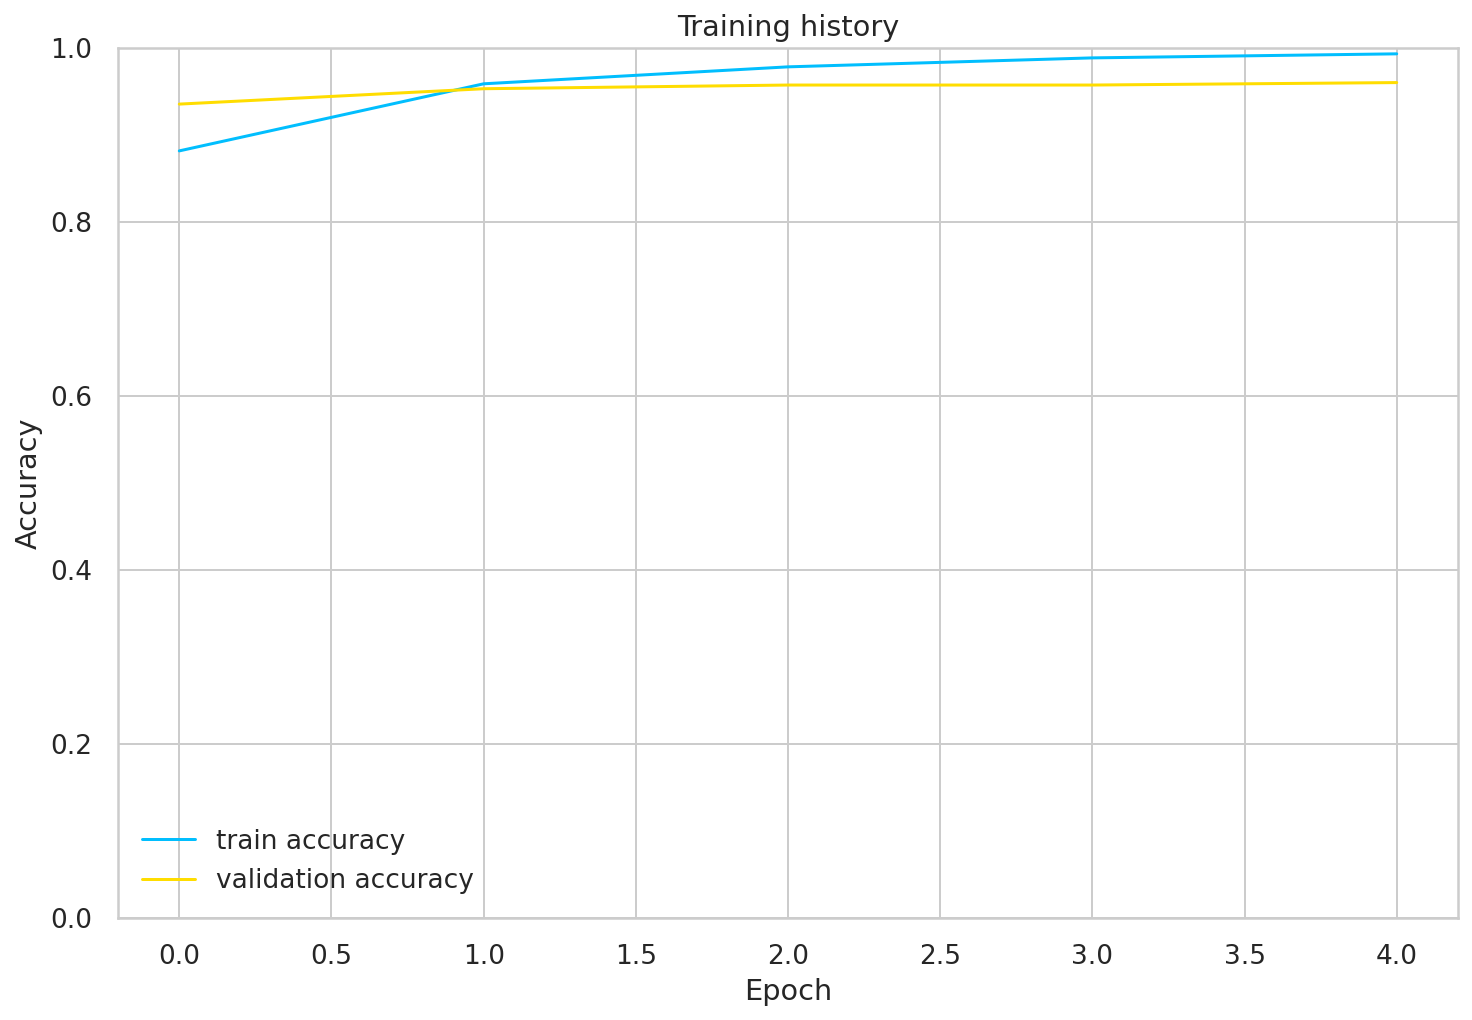

In [ ]:
history_cpu = {'train_acc':[],'val_acc':[]}
for tens in history['train_acc']:
  history_cpu['train_acc'].append(tens.to('cpu'))

for tens in history['val_acc']:
  history_cpu['val_acc'].append(tens.to('cpu'))
  
plt.plot(history_cpu['train_acc'] , label='train accuracy')
plt.plot(history_cpu['val_acc'] , label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
model = labelsClassifier(len(class_names))
model.load_state_dict(torch.load('/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model_state.bin'))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
test_acc,test_loss = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.9540636042402827

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  text = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      text.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return text, predictions, prediction_probs, real_values

In [ ]:
y_sentence, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Neutral       0.98      0.96      0.97      1259
    positive       0.94      0.96      0.95      1050
    negative       0.91      0.92      0.91       521

    accuracy                           0.95      2830
   macro avg       0.95      0.95      0.95      2830
weighted avg       0.95      0.95      0.95      2830



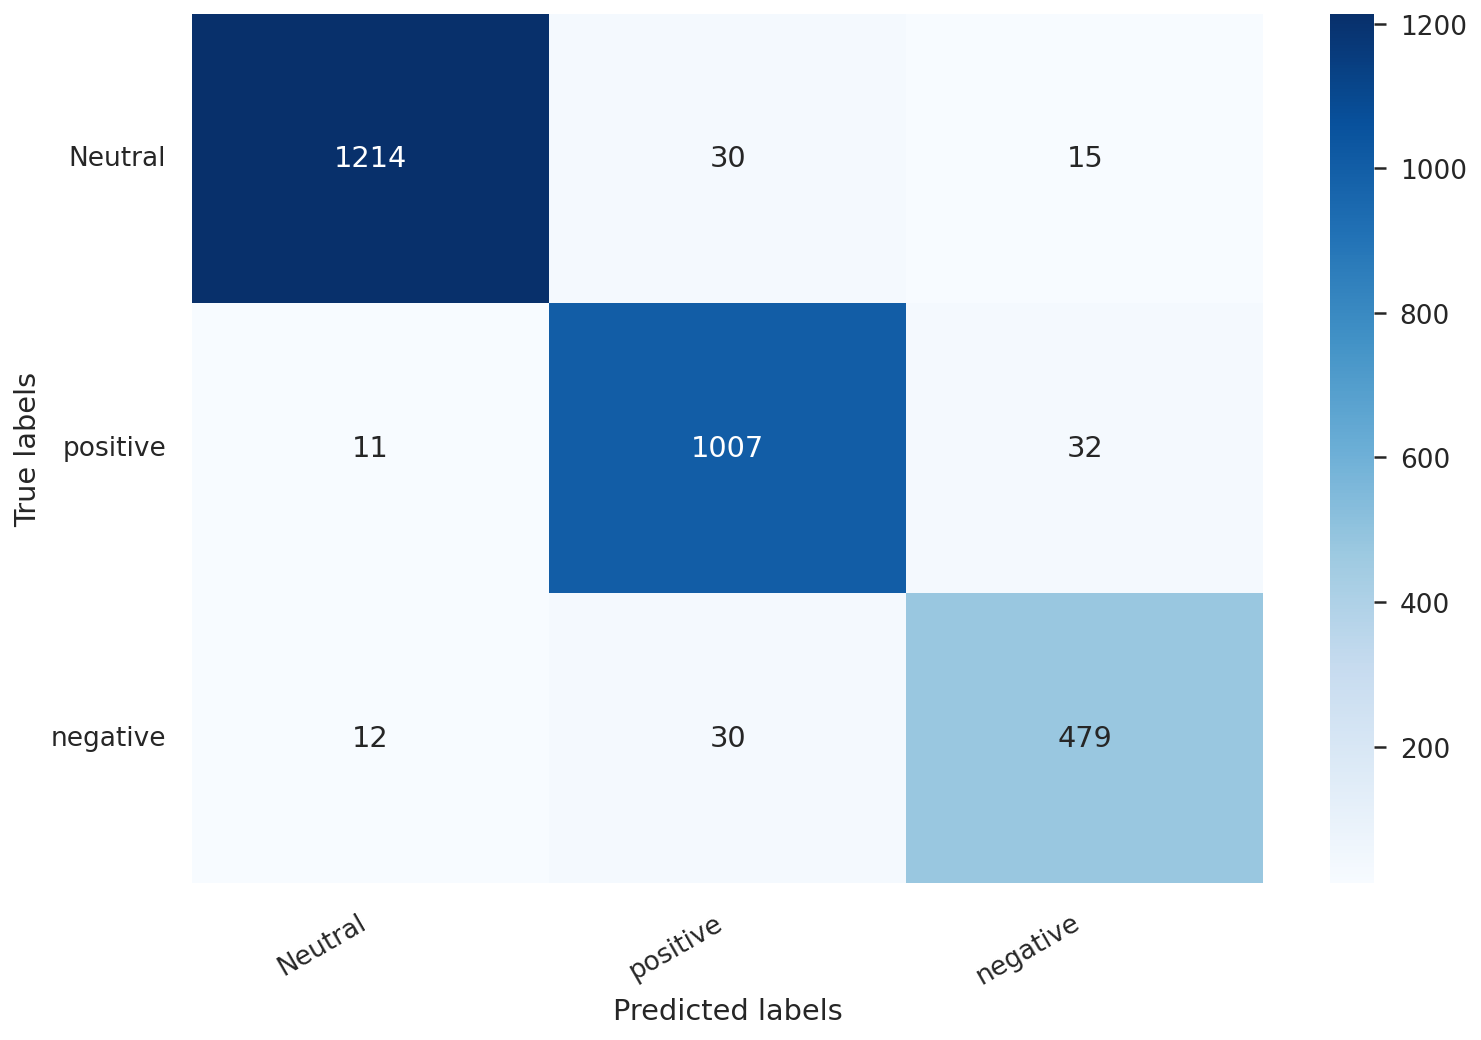

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels');
;
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
text = "I think COVID vaccience have a great impact"

In [ ]:
encoded_tweet = tokenizer.encode_plus(
  text,
  pad_to_max_length = True,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  return_attention_mask=True,
  return_tensors='pt',
)

In [ ]:
print(encoded_tweet)

{'input_ids': tensor([[  101,   146,  1341, 18732, 23314,  2137,   191,  7409, 25982,  3633,
          1138,   170,  1632,  3772,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,  

In [ ]:
input_ids = encoded_tweet['input_ids'].to(device)
attention_mask = encoded_tweet['attention_mask'].to(device)

output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)

print(f'text: {text}')
print(f'Sentiment  : {class_names[prediction]}')

text: I think COVID vaccience have a great impact
Sentiment  : positive


# **Single LSTM Model**

In [ ]:
Models_root = "/content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/"

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint(Models_root+"best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history1 = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/10
1325/1327 [============================>.] - ETA: 0s - loss: 0.7826 - accuracy: 0.6493
Epoch 1: val_accuracy improved from -inf to 0.77423, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model1.hdf5
1327/1327 [==============================] - 16s 10ms/step - loss: 0.7824 - accuracy: 0.6494 - val_loss: 0.5758 - val_accuracy: 0.7742
Epoch 2/10
1324/1327 [============================>.] - ETA: 0s - loss: 0.5175 - accuracy: 0.8050
Epoch 2: val_accuracy improved from 0.77423 to 0.82406, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model1.hdf5
1327/1327 [==============================] - 13s 10ms/step - loss: 0.5174 - accuracy: 0.8051 - val_loss: 0.4776 - val_accuracy: 0.8241
Epoch 3/10
1325/1327 [============================>.] - ETA: 0s - loss: 0.4265 - accuracy: 0.8480
Epoch 3: val_accuracy

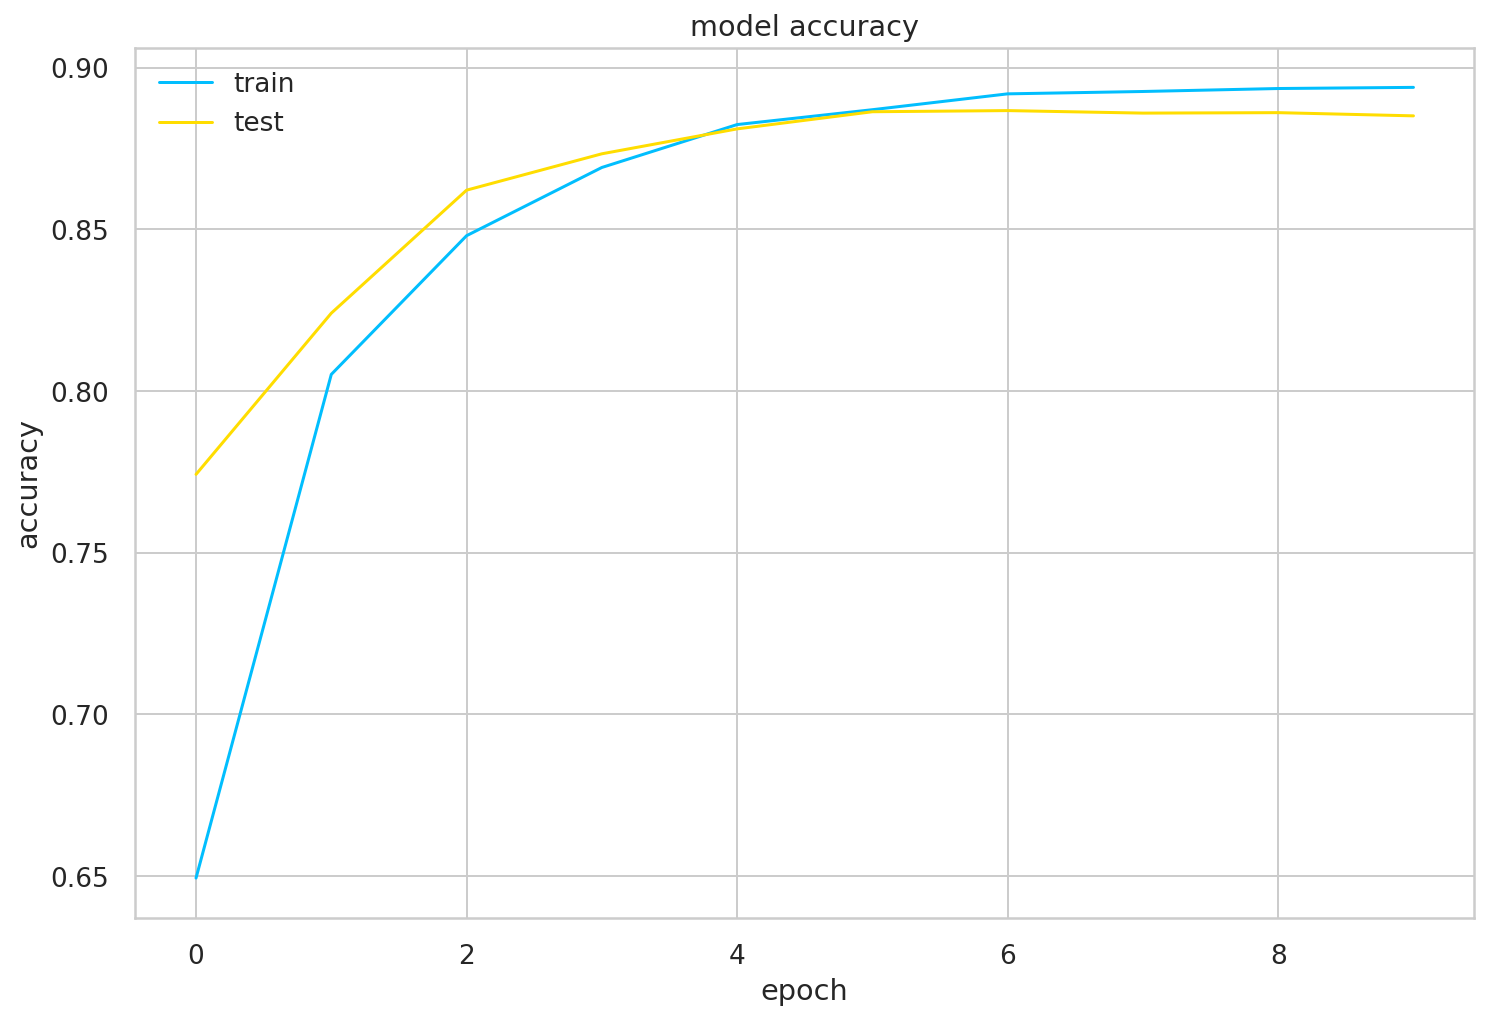

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

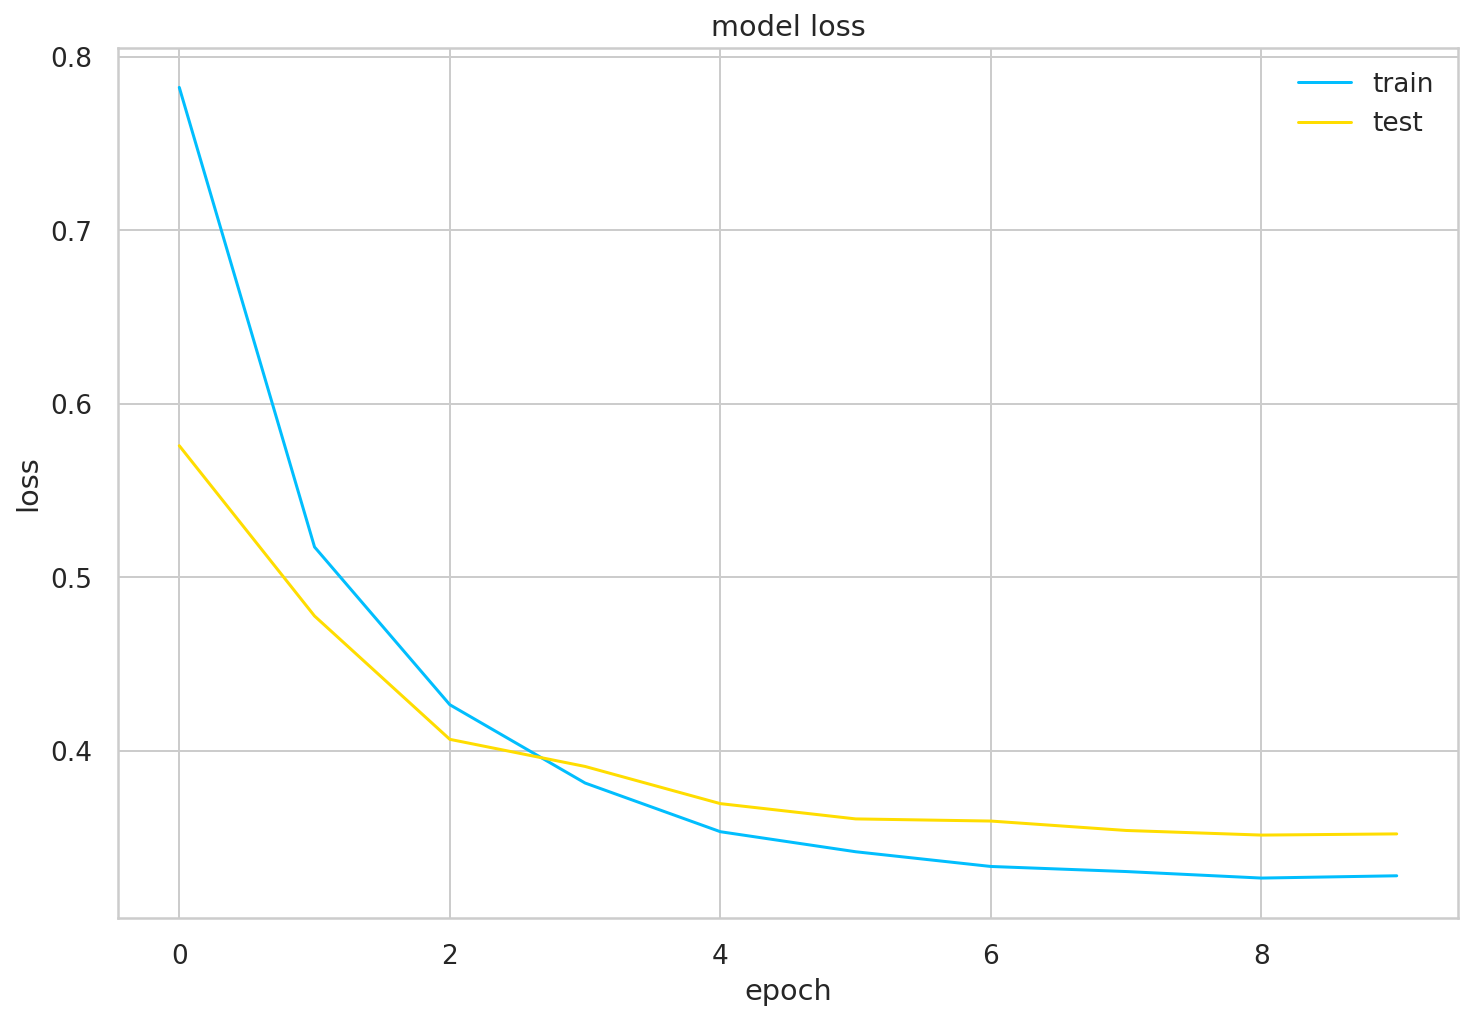

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_model = keras.models.load_model(Models_root+"best_model1.hdf5")

In [ ]:
lstmpredict = model1.predict(X_test)
print(lstmpredict)

443/443 [==============================] - 2s 4ms/step
[[0.9245483  0.05539333 0.02005836]
 [0.949681   0.02352753 0.0267915 ]
 [0.21148224 0.6395842  0.14893359]
 ...
 [0.23016727 0.02999313 0.7398396 ]
 [0.03380815 0.04520175 0.9209901 ]
 [0.9437061  0.02554389 0.03074998]]


In [ ]:
lstmpredict.shape

(14147, 3)

In [ ]:
X_test.shape

(14147, 200)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

443/443 - 2s - loss: 0.3540 - accuracy: 0.8861 - 2s/epoch - 5ms/step
Model accuracy:  0.8860535621643066


In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(lstmpredict, axis=1)))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      6194
           1       0.79      0.76      0.78      2624
           2       0.88      0.90      0.89      5329

    accuracy                           0.89     14147
   macro avg       0.87      0.86      0.86     14147
weighted avg       0.88      0.89      0.89     14147



# **Bidirectional LSTM Model**

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# Save the Modek
checkpoint2 = ModelCheckpoint(Models_root+"best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
# Train the Model
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
1327/1327 [==============================] - ETA: 0s - loss: 0.7831 - accuracy: 0.6520
Epoch 1: val_accuracy improved from -inf to 0.76878, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model2.hdf5
1327/1327 [==============================] - 26s 17ms/step - loss: 0.7831 - accuracy: 0.6520 - val_loss: 0.5898 - val_accuracy: 0.7688
Epoch 2/10
1326/1327 [============================>.] - ETA: 0s - loss: 0.5134 - accuracy: 0.8081
Epoch 2: val_accuracy improved from 0.76878 to 0.83120, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model2.hdf5
1327/1327 [==============================] - 22s 17ms/step - loss: 0.5135 - accuracy: 0.8081 - val_loss: 0.4645 - val_accuracy: 0.8312
Epoch 3/10
1324/1327 [============================>.] - ETA: 0s - loss: 0.4153 - accuracy: 0.8533
Epoch 3: val_accuracy

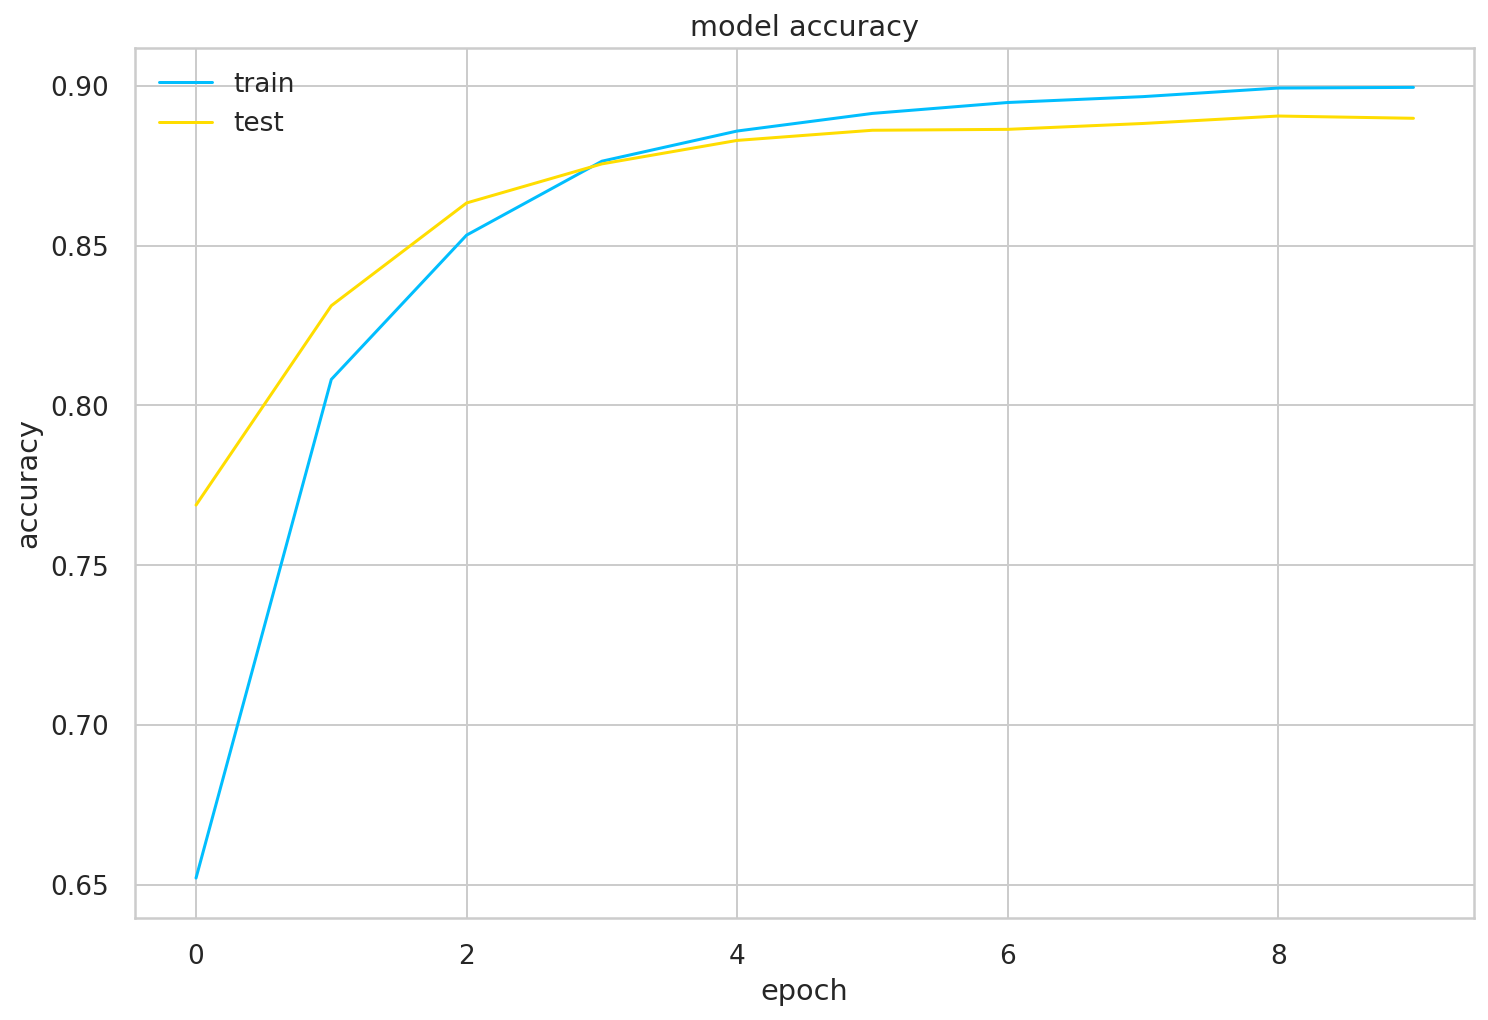

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

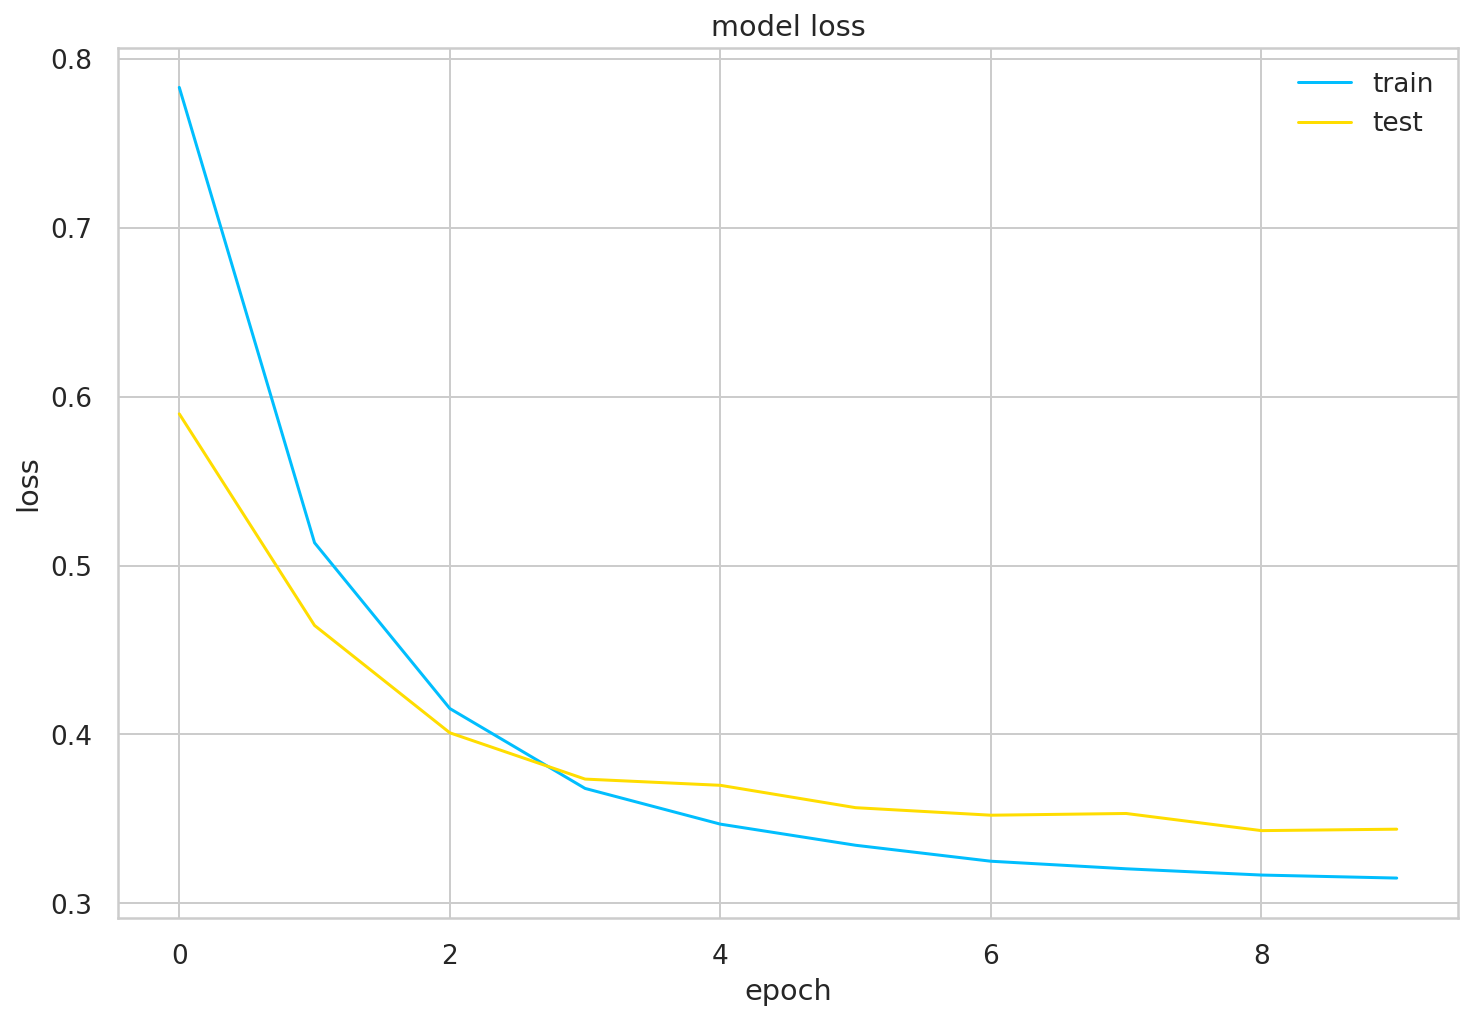

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_model = keras.models.load_model(Models_root+"best_model2.hdf5")

In [ ]:
secpredictions = best_model.predict(X_test)
print(secpredictions)

443/443 [==============================] - 3s 6ms/step
[[0.93879676 0.04683673 0.01436653]
 [0.9825052  0.00884854 0.00864614]
 [0.20233616 0.586321   0.21134286]
 ...
 [0.09492637 0.03669005 0.8683836 ]
 [0.01082532 0.03531862 0.95385605]
 [0.9729624  0.01348488 0.0135528 ]]


In [ ]:
secpredictions.shape

(14147, 3)

In [ ]:
y_test.shape

(14147, 3)

In [ ]:
test_loss2, test_acc2 = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc2)

443/443 - 4s - loss: 0.3430 - accuracy: 0.8906 - 4s/epoch - 9ms/step
Model accuracy:  0.890577495098114


In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(secpredictions, axis=1)))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      6194
           1       0.82      0.75      0.79      2624
           2       0.88      0.91      0.90      5329

    accuracy                           0.89     14147
   macro avg       0.88      0.86      0.87     14147
weighted avg       0.89      0.89      0.89     14147



**Confusion Matrix**

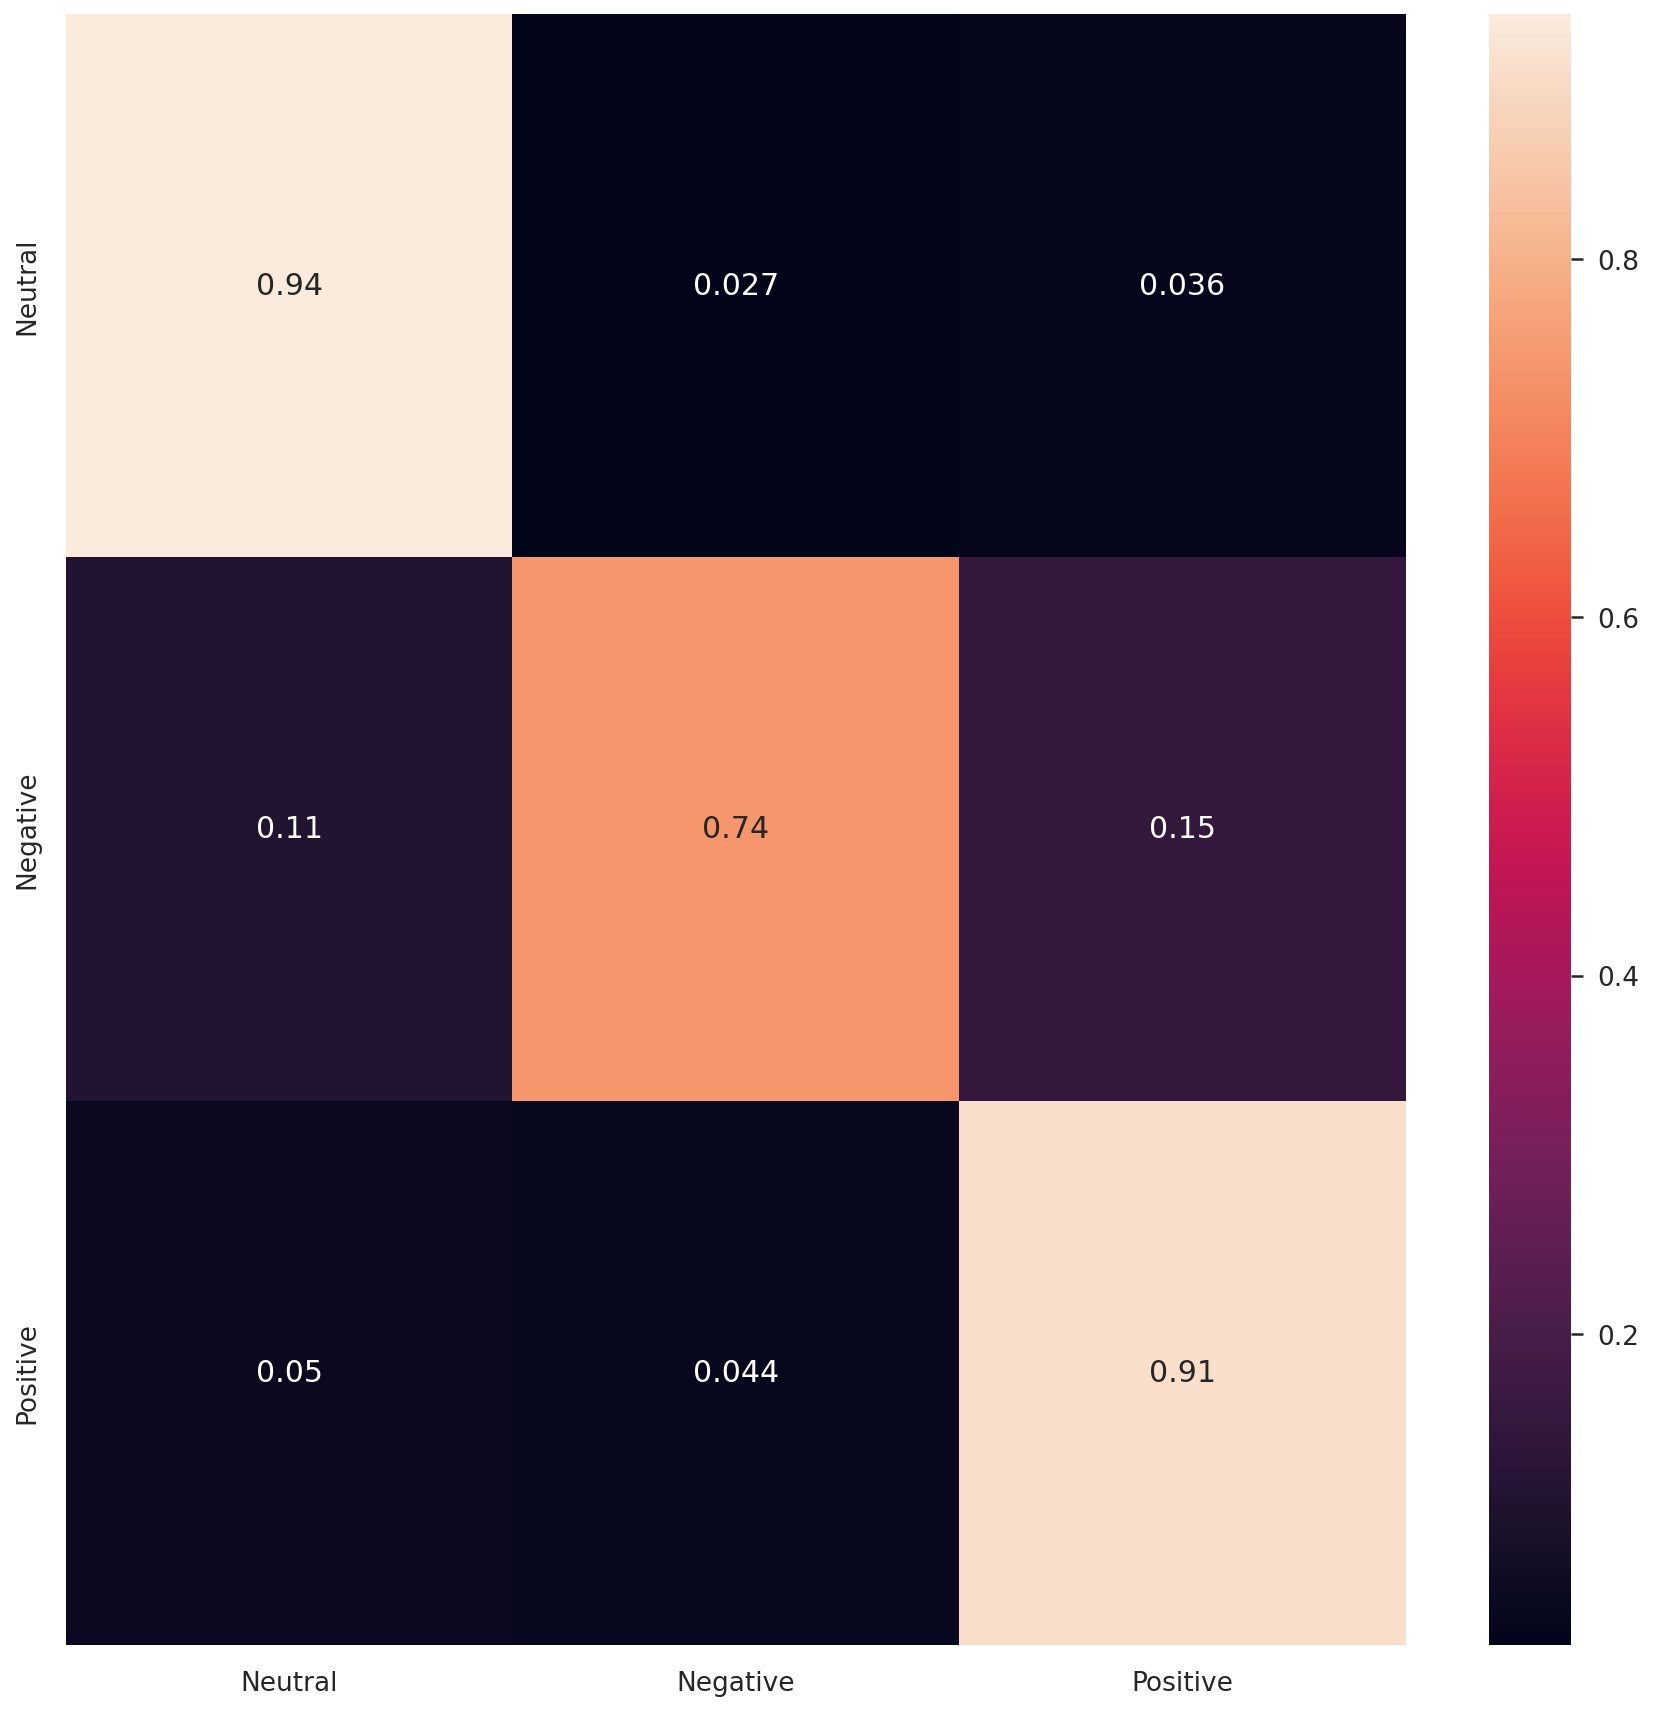

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(secpredictions, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])

#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
seaborn.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
sentiment = ['Neutral','Negative','Positive']

In [ ]:
sequence = tokenizer.texts_to_sequences(['the trump administration failed to deliver on vaccine promises shocker covidiots coronavirus covidvaccine'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 22ms/step


'Neutral'